# 1. Préparation des Données

## Installation des librairies nécessaires

In [344]:
%pip install numpy pandas scikit-learn matplotlib seaborn plotly nbformat imblearn

Note: you may need to restart the kernel to use updated packages.


## Ouverture du fichier CSV

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Lecture du fichier csv
arbre_df = pd.read_csv('Data_Arbre.csv')
print(type(arbre_df))

<class 'pandas.core.frame.DataFrame'>


## Affichage des premières lignes du jeu de données pour comprendre la structure

In [5]:
arbre_df.head(10)

longitude   latitude                     clc_quartier  \
0   3.293264  49.840500         Quartier du Centre-Ville   
1   3.273380  49.861409           Quartier du Vermandois   
2   3.289068  49.844513         Quartier du Centre-Ville   
3   3.302387  49.861778             Quartier de l'Europe   
4   3.304047  49.858446             Quartier de l'Europe   
5   3.305537  49.860928             Quartier de l'Europe   
6   3.271264  49.837897  Quartier Saint-Martin - Oëstres   
7   3.270542  49.837590  Quartier Saint-Martin - Oëstres   
8   3.270364  49.837514  Quartier Saint-Martin - Oëstres   
9   3.269999  49.837363  Quartier Saint-Martin - Oëstres   

              clc_secteur  haut_tot  haut_tronc  tronc_diam fk_arb_etat  \
0             Quai Gayant       6.0         2.0        37.0    EN PLACE   
1              Stade Cepy      13.0         1.0       160.0    EN PLACE   
2   Rue Villebois Mareuil      12.0         3.0       116.0    REMPLACÉ   
3  Square des Marronniers      16.0         3.0       150.0    EN PLACE   
4           Avenue Buffon       5.0         2.0       170.0    Essouché   
5             Rue Laplace       8.0         3.0       103.0    EN PLACE   
6            Rue de Paris       6.0         3.0       100.0    EN PLACE   
7            Rue de Paris       9.0         4.0       135.0    EN PLACE   
8            Rue de Paris       9.0         4.0       121.0    EN PLACE   
9            Rue de Paris       9.0         2.0       107.0    EN PLACE   

  fk_stadedev         fk_port      fk_pied fk_situation fk_revetement  \
0       Jeune      semi libre        gazon   Alignement           Non   
1      Adulte      semi libre        gazon       Groupe           Non   
2      Adulte      semi libre        gazon   Alignement           Non   
3      Adulte      semi libre        gazon       Groupe           Non   
4      Adulte          réduit        gazon        Isolé           Non   
5      Adulte  réduit relâché  fosse arbre   Alignement           Oui   
6      Adulte          réduit        gazon   Alignement           Non   
7      Adulte  réduit relâché        gazon   Alignement           Non   
8      Adulte  réduit relâché        gazon   Alignement           Non   
9      Adulte  réduit relâché        gazon   Alignement           Non   

   age_estim  fk_prec_estim  clc_nbr_diag fk_nomtech villeca feuillage  \
0       15.0            5.0           0.0     QUERUB   VILLE   Feuillu   
1       50.0           10.0           0.0  PINNIGnig   VILLE  Conifère   
2       30.0           10.0           0.0     ACEPSE   VILLE   Feuillu   
3       50.0            2.0           0.0     ACEPLA   VILLE   Feuillu   
4       40.0            2.0           0.0     SALBAB   VILLE   Feuillu   
5       30.0           10.0           0.0     ACEPLA   VILLE   Feuillu   
6       50.0           10.0           1.0     TILCOR   VILLE   Feuillu   
7       50.0           10.0           2.0     TILCOR   VILLE   Feuillu   
8       50.0           10.0           2.0     TILCOR   VILLE   Feuillu   
9       50.0           10.0           2.0     TILCOR   VILLE   Feuillu   

  remarquable  
0         Non  
1         Non  
2         Non  
3         Non  
4         Non  
5         Non  
6         Non  
7         Non  
8         Non  
9         Non

## Affichage de la distribution des états des arbres

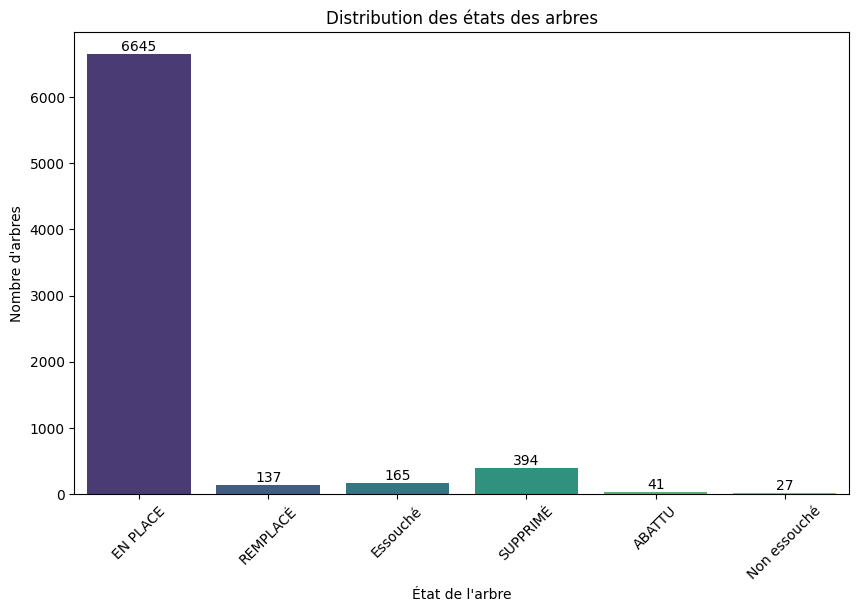

In [6]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="fk_arb_etat", hue="fk_arb_etat", data=arbre_df, palette="viridis")

for i in range(0, len(ax.patches)):
    ax.bar_label(ax.containers[i])

plt.title("Distribution des états des arbres")
plt.xlabel("État de l'arbre")
plt.ylabel("Nombre d'arbres")
plt.xticks(rotation=45)
plt.show()

## Suppression des lignes différentes de Essouché / Non essouché à partir de la colonne fk_arb_etat

In [7]:
arbre_essouch = arbre_df[arbre_df['fk_arb_etat'].isin(['Essouché', 'Non essouché'])]

### Affichage de la nouvelle distribution de l'état des arbres

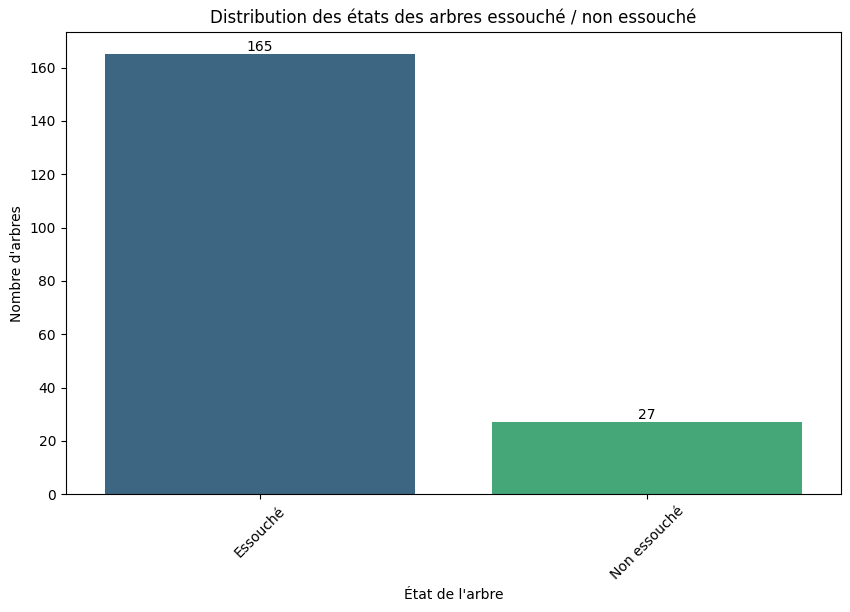

In [8]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="fk_arb_etat", hue="fk_arb_etat", data=arbre_essouch, palette="viridis")

for i in range(0, len(ax.patches)):
    ax.bar_label(ax.containers[i])
    
plt.title("Distribution des états des arbres essouché / non essouché")
plt.xlabel("État de l'arbre")
plt.ylabel("Nombre d'arbres")
plt.xticks(rotation=45)
plt.show()

Nous constatons que la distribution est inégale, et donc pour que notre prédiction soit correcte il faudrait trouver un moyen d'équilibrer cette distribution. Pour cela nous pouvons partir du principe que les arbres abbatus sont des arbres non essouché.

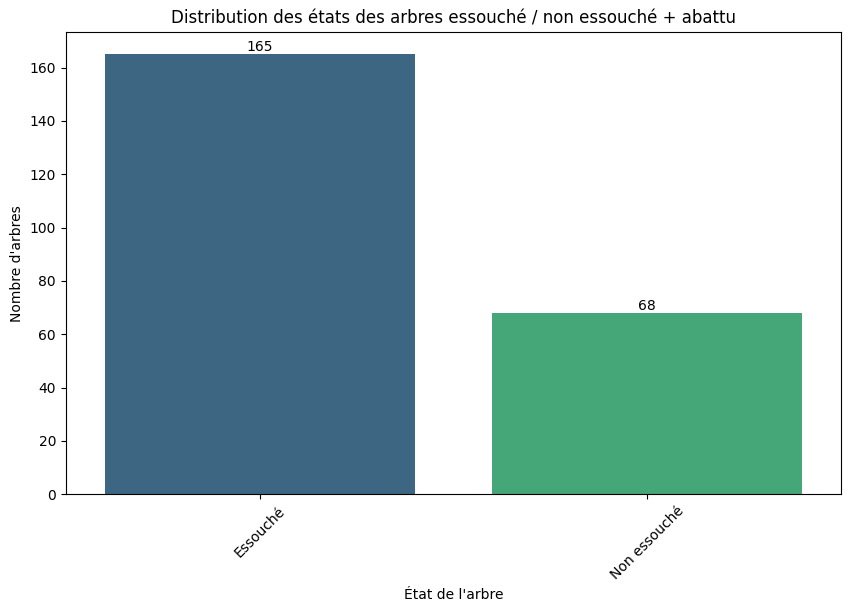

In [9]:
arbre_abattu = arbre_df[arbre_df['fk_arb_etat'] == 'ABATTU'].copy()
arbre_abattu['fk_arb_etat'] = 'Non essouché'
arbre_essouch = pd.concat([arbre_essouch, arbre_abattu], ignore_index=True)


plt.figure(figsize=(10, 6))
ax = sns.countplot(x="fk_arb_etat", hue="fk_arb_etat", data=arbre_essouch, palette="viridis")

for i in range(0, len(ax.patches)):
    ax.bar_label(ax.containers[i])
    
plt.title("Distribution des états des arbres essouché / non essouché + abattu")
plt.xlabel("État de l'arbre")
plt.ylabel("Nombre d'arbres")
plt.xticks(rotation=45)
plt.show()

Les données ne sont toujours pas distribuées équitablement et donc afin d'éviter les biais dans notre modèle nous allons faire de l'oversampling de notre jeu de donnée.

## Encodage des données catégorielles

In [10]:
from sklearn.preprocessing import LabelEncoder
import joblib

arbre_encoded = arbre_essouch.copy()
arbre_encoded.head(10)

longitude   latitude                     clc_quartier  \
0   3.304047  49.858446             Quartier de l'Europe   
1   3.270746  49.844440  Quartier Saint-Martin - Oëstres   
2   3.270951  49.844588  Quartier Saint-Martin - Oëstres   
3   3.294703  49.849927               Quartier Remicourt   
4   3.294280  49.849615               Quartier Remicourt   
5   3.294245  49.849781               Quartier Remicourt   
6   3.293900  49.850235               Quartier Remicourt   
7   3.294526  49.850156               Quartier Remicourt   
8   3.294328  49.850549               Quartier Remicourt   
9   3.294641  49.850508               Quartier Remicourt   

               clc_secteur  haut_tot  haut_tronc  tronc_diam fk_arb_etat  \
0            Avenue Buffon       5.0         2.0       170.0    Essouché   
1          Rue Jean Mermoz      12.0         3.0       160.0    Essouché   
2          Rue Jean Mermoz      13.0         4.0       155.0    Essouché   
3  Parc des Champs-Elysées      24.0         9.0       245.0    Essouché   
4  Parc des Champs-Elysées      20.0        14.0       180.0    Essouché   
5  Parc des Champs-Elysées      25.0        14.0       215.0    Essouché   
6  Parc des Champs-Elysées      18.0         8.0       185.0    Essouché   
7  Parc des Champs-Elysées      24.0        12.0       310.0    Essouché   
8  Parc des Champs-Elysées      22.0        10.0       180.0    Essouché   
9  Parc des Champs-Elysées      22.0        13.0       190.0    Essouché   

  fk_stadedev         fk_port fk_pied fk_situation fk_revetement  age_estim  \
0      Adulte          réduit   gazon        Isolé           Non       40.0   
1      Adulte  réduit relâché   gazon        Isolé           Non       50.0   
2      Adulte  réduit relâché   gazon        Isolé           Non       50.0   
3      Adulte      semi libre   gazon       Groupe           Non       80.0   
4      Adulte      semi libre   gazon       Groupe           Non       80.0   
5      Adulte      semi libre   gazon       Groupe           Non       80.0   
6      Adulte      semi libre   gazon       Groupe           Non       80.0   
7      Adulte      semi libre   gazon       Groupe           Non       80.0   
8      Adulte      semi libre   gazon       Groupe           Non       80.0   
9      Adulte      semi libre   gazon       Groupe           Non       80.0   

   fk_prec_estim  clc_nbr_diag fk_nomtech villeca feuillage remarquable  
0            2.0           0.0     SALBAB   VILLE   Feuillu         Non  
1           10.0           1.0     PLAACE   VILLE   Feuillu         Non  
2           10.0           2.0     PLAACE   VILLE   Feuillu         Non  
3           20.0           2.0     ACEPLA   VILLE   Feuillu         Non  
4           20.0           2.0     TILCOR   VILLE   Feuillu         Non  
5           20.0           1.0     TILCOR   VILLE   Feuillu         Non  
6           20.0           1.0     TILCOR   VILLE   Feuillu         Non  
7           20.0           1.0     ACEPLA   VILLE   Feuillu         Non  
8           20.0           1.0     ACEPSE   VILLE   Feuillu         Non  
9           20.0           1.0     ACEPSE   VILLE   Feuillu         Non

In [480]:

label_encoders = {} # Liste des modèles d'encodage pour les réutiliser
for column in arbre_encoded.select_dtypes(include=['object']).columns:
    lab_encoder = LabelEncoder()
    arbre_encoded[column] = lab_encoder.fit_transform(arbre_encoded[column])
    label_encoders[column] = lab_encoder

joblib.dump(label_encoders, 'label_encoders.pkl')

arbre_encoded.head(10)

longitude   latitude  clc_quartier  clc_secteur  haut_tot  haut_tronc  \
0   3.304047  49.858446             6            1       5.0         2.0   
1   3.270746  49.844440             4           52      12.0         3.0   
2   3.270951  49.844588             4           52      13.0         4.0   
3   3.294703  49.849927             2           31      24.0         9.0   
4   3.294280  49.849615             2           31      20.0        14.0   
5   3.294245  49.849781             2           31      25.0        14.0   
6   3.293900  49.850235             2           31      18.0         8.0   
7   3.294526  49.850156             2           31      24.0        12.0   
8   3.294328  49.850549             2           31      22.0        10.0   
9   3.294641  49.850508             2           31      22.0        13.0   

   tronc_diam  fk_arb_etat  fk_stadedev  fk_port  fk_pied  fk_situation  \
0       170.0            0            0        4        4             2   
1       160.0            0            0        5        4             2   
2       155.0            0            0        5        4             2   
3       245.0            0            0        6        4             1   
4       180.0            0            0        6        4             1   
5       215.0            0            0        6        4             1   
6       185.0            0            0        6        4             1   
7       310.0            0            0        6        4             1   
8       180.0            0            0        6        4             1   
9       190.0            0            0        6        4             1   

   fk_revetement  age_estim  fk_prec_estim  clc_nbr_diag  fk_nomtech  villeca  \
0              0       40.0            2.0           0.0          44        1   
1              0       50.0           10.0           1.0          29        1   
2              0       50.0           10.0           2.0          29        1   
3              0       80.0           20.0           2.0           2        1   
4              0       80.0           20.0           2.0          47        1   
5              0       80.0           20.0           1.0          47        1   
6              0       80.0           20.0           1.0          47        1   
7              0       80.0           20.0           1.0           2        1   
8              0       80.0           20.0           1.0           4        1   
9              0       80.0           20.0           1.0           4        1   

   feuillage  remarquable  
0          1            0  
1          1            0  
2          1            0  
3          1            0  
4          1            0  
5          1            0  
6          1            0  
7          1            0  
8          1            0  
9          1            0

Utilisation du label encoder car il s'agit de donnée unique et non ordinal.

## Sélection des données pertinentes

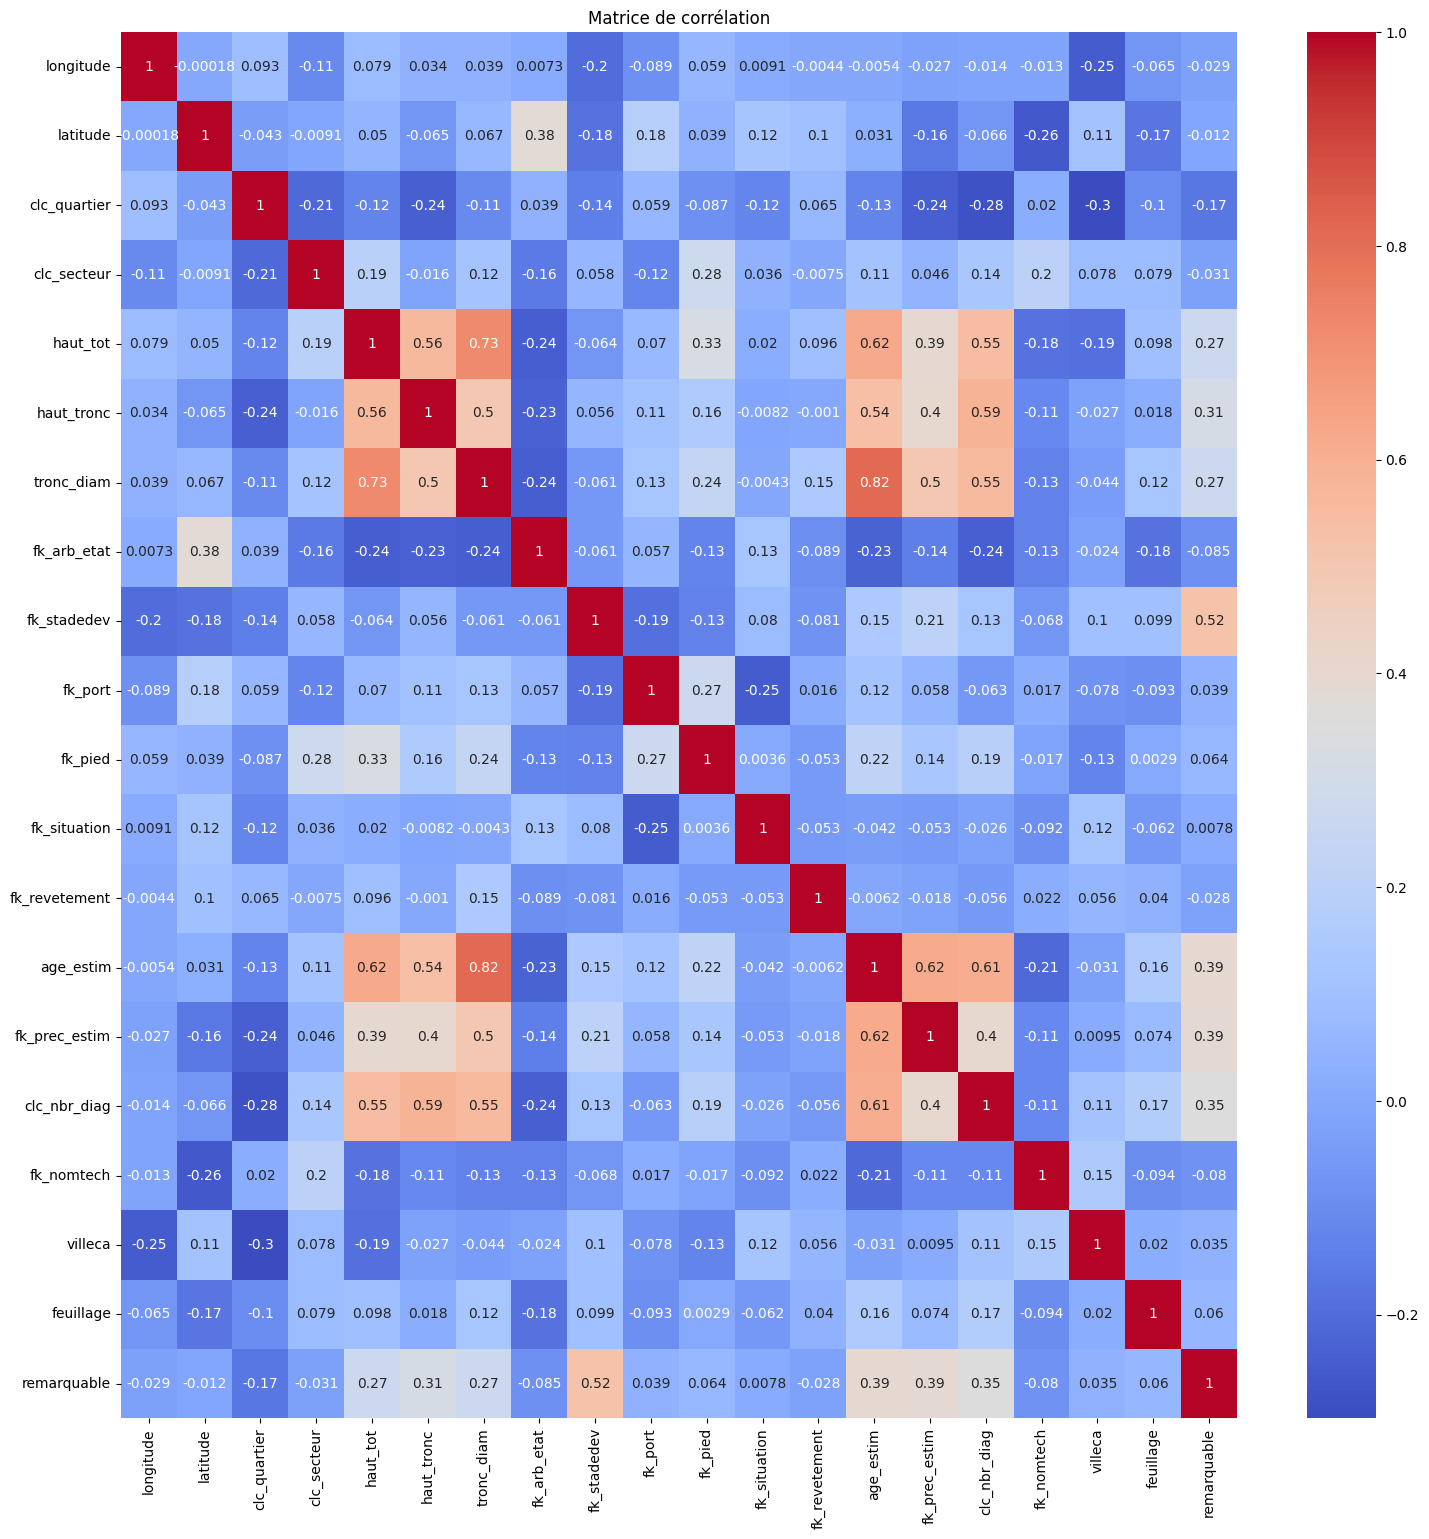

In [481]:
corr_matrix = arbre_encoded.corr()

plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()


Avec la heatmap de corrélation, nous voyons que sur la ligne de `fk_arb_etat` les variables en corrélation avec elle sont:
- `latitude` à 0.38
- `haut_tot` à -0.24
- `haut_tronc` à -0.23
- `tronc_diam` à -0.24
- `age_estim` à -0.23
- `clc_nbr_diag` à -0.24  
Il s'agit donc des données pertinentes à utiliser



## Tests de Khi-deux pour les variables

In [482]:
from sklearn.feature_selection import chi2

X = arbre_encoded.drop('fk_arb_etat', axis=1)
y = arbre_encoded['fk_arb_etat']

khi2_vals, p_vals = chi2(X, y)
khi2_results = pd.DataFrame({'Feature': X.columns, 'Khi2': khi2_vals, 'P-value': p_vals})
print(khi2_results.sort_values(by='Khi2', ascending=False))

          Feature          Khi2        P-value
6      tronc_diam  4.759295e+02  1.642417e-105
12      age_estim  1.827038e+02   1.244805e-41
3     clc_secteur  8.857534e+01   4.893526e-21
4        haut_tot  5.195793e+01   5.670262e-13
15     fk_nomtech  3.954746e+01   3.201822e-10
5      haut_tronc  2.794441e+01   1.248514e-07
14   clc_nbr_diag  2.062236e+01   5.593884e-06
13  fk_prec_estim  1.595636e+01   6.481975e-05
11  fk_revetement  1.780829e+00   1.820476e-01
18    remarquable  1.648485e+00   1.991653e-01
10   fk_situation  1.607501e+00   2.048434e-01
17      feuillage  1.345603e+00   2.460483e-01
7     fk_stadedev  1.037957e+00   3.082971e-01
9         fk_pied  7.161536e-01   3.974085e-01
2    clc_quartier  4.098115e-01   5.220652e-01
8         fk_port  2.457714e-01   6.200685e-01
16        villeca  8.595807e-03   9.261311e-01
1        latitude  6.750566e-05   9.934445e-01
0       longitude  8.077111e-07   9.992829e-01


Suite à ce test du Khi2, nous pouvons voir que la variable `clc_secteur` est pertinente pour la prédiction de l'état de l'arbre

In [483]:
col_pertinentes = ["latitude", "clc_secteur", "haut_tot", "haut_tronc", "tronc_diam", "age_estim", "clc_nbr_diag"]
col_pertinentes_num = ["latitude", "haut_tot", "haut_tronc", "tronc_diam", "age_estim", "clc_nbr_diag"]

## Normalisation des données

In [484]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
arbre_encoded[col_pertinentes_num] = scaler.fit_transform(arbre_encoded[col_pertinentes_num])

joblib.dump(scaler, 'normalizer.pkl')

arbre_encoded.head(10)

longitude  latitude  clc_quartier  clc_secteur  haut_tot  haut_tronc  \
0   3.304047  0.753836             6            1  0.085714    0.133333   
1   3.270746  0.398443             4           52  0.285714    0.200000   
2   3.270951  0.402208             4           52  0.314286    0.266667   
3   3.294703  0.537675             2           31  0.628571    0.600000   
4   3.294280  0.529763             2           31  0.514286    0.933333   
5   3.294245  0.533957             2           31  0.657143    0.933333   
6   3.293900  0.545498             2           31  0.457143    0.533333   
7   3.294526  0.543475             2           31  0.628571    0.800000   
8   3.294328  0.553451             2           31  0.571429    0.666667   
9   3.294641  0.552419             2           31  0.571429    0.866667   

   tronc_diam  fk_arb_etat  fk_stadedev  fk_port  fk_pied  fk_situation  \
0    0.481268            0            0        4        4             2   
1    0.452450            0            0        5        4             2   
2    0.438040            0            0        5        4             2   
3    0.697406            0            0        6        4             1   
4    0.510086            0            0        6        4             1   
5    0.610951            0            0        6        4             1   
6    0.524496            0            0        6        4             1   
7    0.884726            0            0        6        4             1   
8    0.510086            0            0        6        4             1   
9    0.538905            0            0        6        4             1   

   fk_revetement  age_estim  fk_prec_estim  clc_nbr_diag  fk_nomtech  villeca  \
0              0   0.179487            2.0      0.000000          44        1   
1              0   0.230769           10.0      0.333333          29        1   
2              0   0.230769           10.0      0.666667          29        1   
3              0   0.384615           20.0      0.666667           2        1   
4              0   0.384615           20.0      0.666667          47        1   
5              0   0.384615           20.0      0.333333          47        1   
6              0   0.384615           20.0      0.333333          47        1   
7              0   0.384615           20.0      0.333333           2        1   
8              0   0.384615           20.0      0.333333           4        1   
9              0   0.384615           20.0      0.333333           4        1   

   feuillage  remarquable  
0          1            0  
1          1            0  
2          1            0  
3          1            0  
4          1            0  
5          1            0  
6          1            0  
7          1            0  
8          1            0  
9          1            0

La normalisation utilisée pour les données est la normalisation min-max, elle permet de ramener chaque variable entre 0 et 1.

# 2. Apprentissage Supervisé pour la classification

## Division des X et Y pour le jeu de test et d'entraînement

In [508]:
from sklearn.model_selection import train_test_split
X = arbre_encoded[col_pertinentes]
y = arbre_encoded['fk_arb_etat']

# Division des données pour l'entrainement et le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Oversampling du jeu de données

In [509]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

## Création d'une liste de classifieur, pour tous les tester

In [510]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

Accuracy de chaque fold: [0.65957447 0.72340426 0.5106383  0.86956522 0.73913043]
Moyenne des taux de classification: 0.7004625346901017
Logistic Regression:
Accuracy: 0.8085106382978723
ROC AUC Score: 0.91


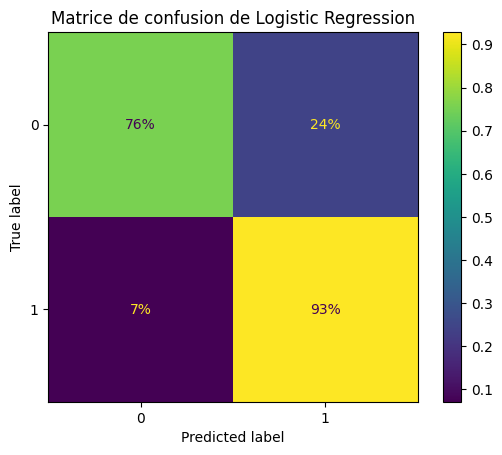

Accuracy de chaque fold: [0.08510638 0.65957447 0.74468085 0.5        0.32608696]
Moyenne des taux de classification: 0.4630897317298797
Decision Tree:
Accuracy: 0.7659574468085106
ROC AUC Score: 0.73


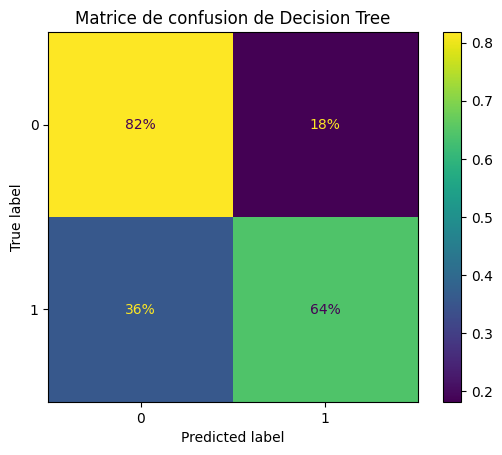

Accuracy de chaque fold: [0.61702128 0.72340426 0.76595745 0.58695652 0.63043478]
Moyenne des taux de classification: 0.6647548566142462
Random Forest:
Accuracy: 0.9361702127659575
ROC AUC Score: 0.94


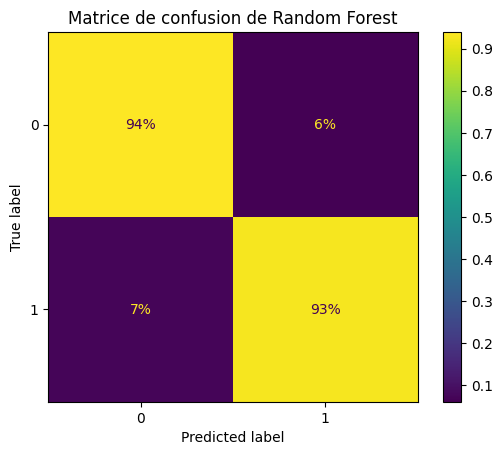

Accuracy de chaque fold: [0.70212766 0.72340426 0.74468085 0.65217391 0.65217391]
Moyenne des taux de classification: 0.6949121184088808
k-Nearest Neighbors:
Accuracy: 0.851063829787234
ROC AUC Score: 0.90


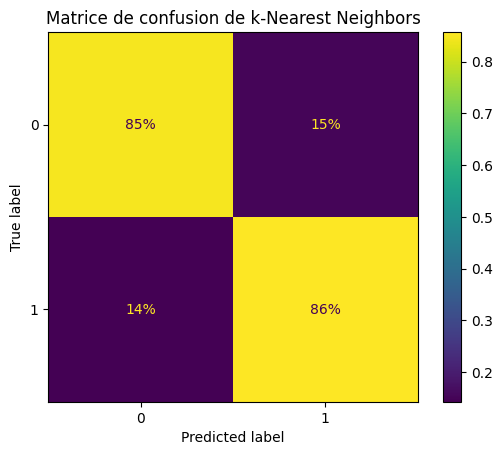

Accuracy de chaque fold: [0.40425532 0.65957447 0.76595745 0.52173913 0.56521739]
Moyenne des taux de classification: 0.5833487511563367
Gradient Boosting:
Accuracy: 0.9148936170212766
ROC AUC Score: 0.93


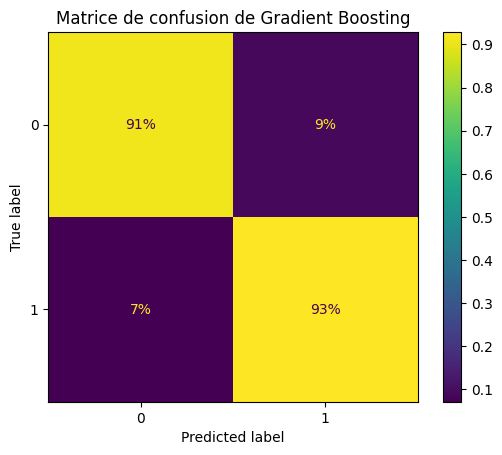

In [511]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import cross_val_score

# Dictionnaire pour stocker les scores
scores = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC AUC': []
}

for name, classifier in classifiers.items():
    classifier.fit(X_resampled, y_resampled)
    y_pred = classifier.predict(X_test)
    
    # Calcul du score de validation croisée
    cv_scores = cross_val_score(classifier, X, y, cv=5, scoring="accuracy")

    print(f"Accuracy de chaque fold: {cv_scores}")
    print(f"Moyenne des taux de classification: {cv_scores.mean()}")

    # Calcul des scores
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])

    # Enregistrer les scores
    scores['Classifier'].append(name)
    scores['Accuracy'].append(accuracy)
    scores['Precision'].append(precision_score(y_test, y_pred))
    scores['Recall'].append(recall_score(y_test, y_pred))
    scores['F1-Score'].append(f1_score(y_test, y_pred))
    scores['ROC AUC'].append(roc_auc)
    
    # Afficher les résultats
    print(f"{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"ROC AUC Score: {roc_auc:.2f}")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", values_format=".0%")
    plt.title(f"Matrice de confusion de {name}")
    plt.show()

# Convertir en DataFrame
scores_df = pd.DataFrame(scores)


# 3. Métriques pour la classification

## Affichage d'un graphique pour comparer les métriques des différents modèles

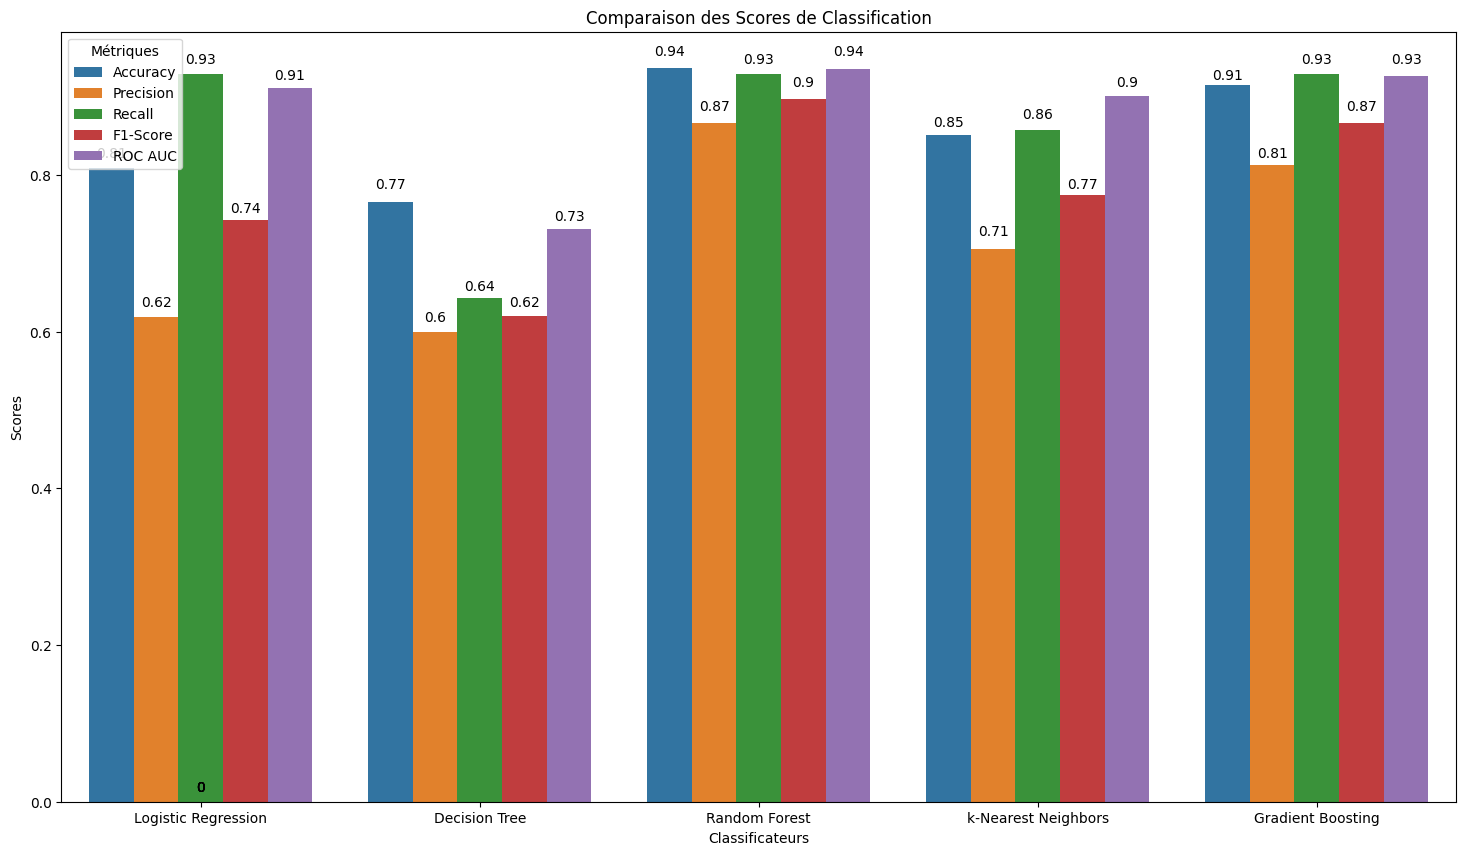

In [512]:
plt.figure(figsize=(18, 10))

scores_melted = scores_df.melt(id_vars='Classifier', var_name='Metric', value_name='Score')

ax = sns.barplot(x='Classifier', y='Score', hue='Metric', data=scores_melted)

for p in ax.patches:
    height = round(p.get_height(), 2)
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Comparaison des Scores de Classification')
plt.xlabel('Classificateurs')
plt.ylabel('Scores')
plt.legend(title='Métriques')
plt.show()


D'après ce test de tout les classificateur, les meilleur sont RandomForest, K-Nearest Neighbors, GradientBoosting, nous allons donc effectuer notre GridSearch sur ceux-ci.

## Grid search pour tester les combinaisons d'hyperparamètres du modèle

### Grid Search pour le RandomForest

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_esti

/home/oxbian/Documents/Dev/Projet-IA/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


2700 fits failed out of a total of 8100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1820 fits failed with the following error:
Traceback (most recent call last):
  File "/home/oxbian/Documents/Dev/Projet-IA/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/oxbian/Documents/Dev/Projet-IA/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/oxbian/Documents/Dev/Projet-IA/.venv/lib/python3.12/site-packages/sklearn/base

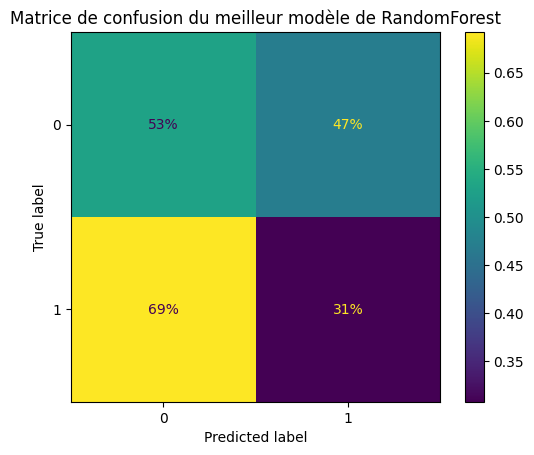

['best_rf_model.pkl']

In [493]:
from sklearn.model_selection import GridSearchCV
import joblib

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling du modèle pour le grid Search
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Entraîner le modèle
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1_macro')
grid_search.fit(X_resampled, y_resampled)

# Afficher les meilleurs paramètres et les meilleures performances
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score:", grid_search.best_score_)

# Utiliser le meilleur modèle pour prédire et évaluer
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Performance du meilleur modèle:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")


ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", values_format=".0%")
plt.title(f"Matrice de confusion du meilleur modèle de RandomForest")
plt.show()

# Sauvegarder le meilleur modèle
best_rf = grid_search.best_estimator_
joblib.dump(best_rf, 'best_rf_model.pkl')

### Grid Search pour le K-Nearest Neighbors

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s[CV] END metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s

[CV] END metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END metric=eucl

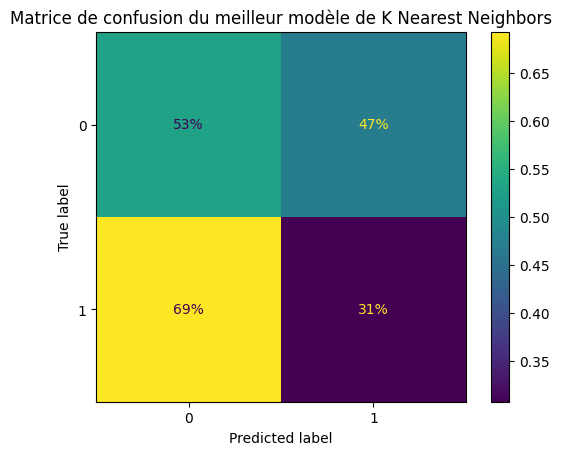

['best_kn_model.pkl']

In [494]:
from sklearn.model_selection import GridSearchCV
import joblib

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling du modèle pour le grid Search
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Entraîner le modèle
kn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'p': [1, 2]  # Utilisé seulement pour la métrique 'minkowski'
}

grid_search = GridSearchCV(kn, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='precision')
grid_search.fit(X_resampled, y_resampled)

# Afficher les meilleurs paramètres et les meilleures performances
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score:", grid_search.best_score_)

# Utiliser le meilleur modèle pour prédire et évaluer
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Performance du meilleur modèle:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")


ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", values_format=".0%")
plt.title(f"Matrice de confusion du meilleur modèle de K Nearest Neighbors")
plt.show()

# Sauvegarder le meilleur modèle
best_kn = grid_search.best_estimator_
joblib.dump(best_kn, 'best_kn_model.pkl')

### Grid Search pour le Gradient Boosting

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
[CV] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learnin

/home/oxbian/Documents/Dev/Projet-IA/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


3645 fits failed out of a total of 10935.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
551 fits failed with the following error:
Traceback (most recent call last):
  File "/home/oxbian/Documents/Dev/Projet-IA/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/oxbian/Documents/Dev/Projet-IA/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/oxbian/Documents/Dev/Projet-IA/.venv/lib/python3.12/site-packages/sklearn/base

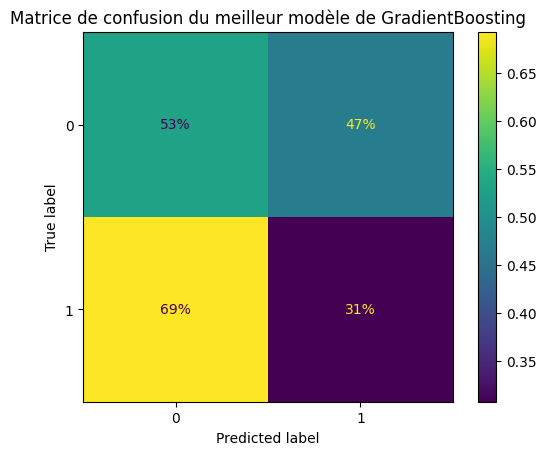

['best_gb_model.pkl']

In [495]:
from sklearn.model_selection import GridSearchCV
import joblib

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling du modèle pour le grid Search
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Entraîner le modèle
gb = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'subsample': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(gb, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='precision')
grid_search.fit(X_resampled, y_resampled)

# Afficher les meilleurs paramètres et les meilleures performances
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score:", grid_search.best_score_)

# Utiliser le meilleur modèle pour prédire et évaluer
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Performance du meilleur modèle:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")


ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", values_format=".0%")
plt.title(f"Matrice de confusion du meilleur modèle de GradientBoosting")
plt.show()

# Sauvegarder le meilleur modèle
best_gb = grid_search.best_estimator_
joblib.dump(best_gb, 'best_gb_model.pkl')

# Test de prédiction + Affichage sur carte

In [8]:
def predict_df(model, encoder, normaliser, df):
    col_pertinentes = ["latitude", "clc_secteur", "haut_tot", "haut_tronc", "tronc_diam", "age_estim", "clc_nbr_diag"]
    col_pertinentes_num = ["latitude", "haut_tot", "haut_tronc", "tronc_diam", "age_estim", "clc_nbr_diag"]
    df_to_pred = df[col_pertinentes]

    for column in df_to_pred.select_dtypes(include=['object']).columns:
        df_to_pred[column] = encoder[column].fit_transform(df_to_pred[column])
        
    df_to_pred[col_pertinentes_num] = normaliser.transform(df_to_pred[col_pertinentes_num])
    df['prediction'] = encoder["fk_arb_etat"].inverse_transform(model.predict(df_to_pred))

    return df

In [10]:
import joblib
import pandas as pd

# Charger le modèle pré-entrainé
model = joblib.load('best_rf_model.pkl')

# Charger l'encodeur pré-entrainé
encoder = joblib.load('label_encoders.pkl')

# Charger le normaliser pré-entrainé
normaliser = joblib.load('normalizer.pkl')

# Lecture du fichier csv
arbre_df = pd.read_csv('Data_Arbre.csv')

df = predict_df(model, encoder, normaliser, arbre_df[arbre_df["fk_arb_etat"]=="EN PLACE"])


/tmp/ipykernel_105504/3304573927.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_pred[column] = encoder[column].fit_transform(df_to_pred[column])
/tmp/ipykernel_105504/3304573927.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_pred[col_pertinentes_num] = normaliser.transform(df_to_pred[col_pertinentes_num])
/tmp/ipykernel_105504/3304573927.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [11]:
import plotly.express as px

# Créer la carte interactive
fig = px.scatter_mapbox(
    df,
    lat='latitude',
    lon='longitude',
    color='prediction',
    size='tronc_diam',
    hover_data={'prediction': True, 'tronc_diam': True, 'haut_tot': True, 'haut_tronc': True},
    color_continuous_scale=px.colors.sequential.Viridis,
    size_max=15,
    zoom=10
)

# Mettre à jour les détails de la carte
fig.update_layout(
    mapbox_style="open-street-map",
    title="Prédictions de déracinement des arbres",
    margin={"r":0,"t":0,"l":0,"b":0}
)

# Afficher la carte
fig.show()

print(f"Nombre d'arbres touchés par la tempête: {len(df[df["prediction"] == "Essouché"])}")
print(f"Nombre d'arbres survivants à la tempête: {len(df[df["prediction"] == "Non essouché"])}")

Nombre d'arbres touchés par la tempête: 4101
Nombre d'arbres survivants à la tempête: 2544
